<center><font size = "10"> Week 9 - Cells in Space  <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Milo Imbeni
<br>Group member2: Gasser Elbanna
<br>Group member3: Louise Placidet

# Ex1. Placing cells in a cubic volume

<font size='3'>Define a cubic volume with the following dimensions: x = (2000, 5000), y = (2000, 5000), z = (-1000, 2000). Place the five morphologies assigned to your group (used in week2 and week7) in random positions inside the cube. Visualize the cells in the cube in three different planes: xy, xz and yz. [1 pt]

### Defining a cubic volume and sampling random positions inside of it:

In [1]:
import numpy as np
rng = np.random.default_rng()

N = 5 # number of positions for the 5 morphologies of our group
volume = [[2000,5000],[2000,5000],[-1000,2000]] # volume bounds [um]

# get positions in required ranges
pos = rng.random((N,3)) # in [0,1)
for i,x in enumerate(volume):
    pos[:,i] = (x[1] - x[0]) * pos[:,i] + x[0]
    
pos # print positions

array([[4052.07723731, 2914.19312977,  356.58220448],
       [2252.92018228, 2835.479212  ,  637.71826253],
       [4126.7323119 , 3613.56599896, 1280.19798807],
       [3235.47732927, 4417.88362926,  689.2746095 ],
       [2202.0524549 , 2409.07316369, -889.27932099]])

### Loading the 5 Morphologies and placing them randomly inside the cube after centering them:

In [2]:
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)

In [3]:
import neurom as nm
morph_files = ['morph_03.swc','morph_06.swc','morph_07.swc','morph_09.swc','morph_10.swc']
morphs = [nm.load_neuron(x) for x in morph_files]

# place all morphologies
for i,m in enumerate(morphs):
    center_morphology(m)
    shift_morphology(m,pos[i])

[x.soma.center for x in morphs] # print centers

[array([4052.07723731, 2914.19312977,  356.58220448]),
 array([2252.92018228, 2835.479212  ,  637.71826253]),
 array([4126.7323119 , 3613.56599896, 1280.19798807]),
 array([3235.47732927, 4417.88362926,  689.2746095 ]),
 array([2202.0524549 , 2409.07316369, -889.27932099])]

### Visualize the cells in the cube in three different planes: xy, xz and yz

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','','black',color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')
    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')


def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


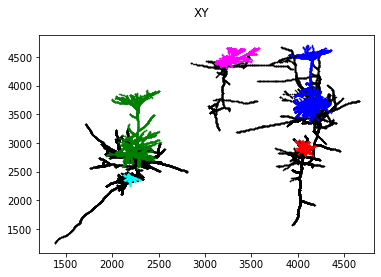

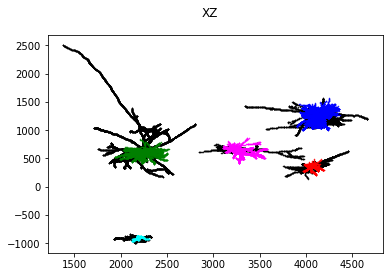

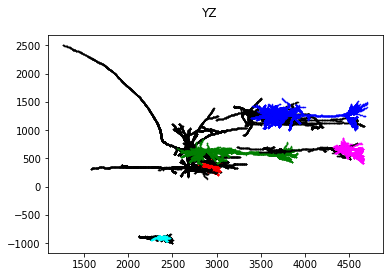

In [5]:
# Plot whole morphologies

plane_setting = ['XY', 'XZ', 'YZ']
for i,plane in enumerate(plane_setting):
    plot_morphologies(morphs, plane = plane)


## Ex2. Cells rotation

<font size='3'>Compute a 2D rotation along the z axis on the inhibitory cells from your data set, the rotation angles should be: 90°, 180° and 270°. Plot the results in xy plane. Compute a 3D rotation to aling the pyramidal cells x axis with the vector (2,1,5). [1.5 pts]

<span style="color:red"> Restart kernel out of precaution

### Loading the inhibitory cells:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm

# Load inhibitory morphologies
morph1 = nm.load_neuron('morph_03.swc')
morph2 = nm.load_neuron('morph_10.swc')

morphs = [morph1, morph2]

In [2]:
# Loading useful functions

# Shifting and Centering Functions
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)
    
# Plotting Functions
import matplotlib.pyplot as plt
import neurom as nm

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','','black',color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')
    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')


def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

PLOTTING BEFORE ROTATION:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


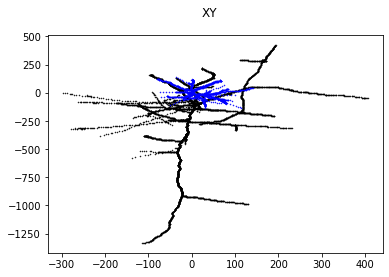

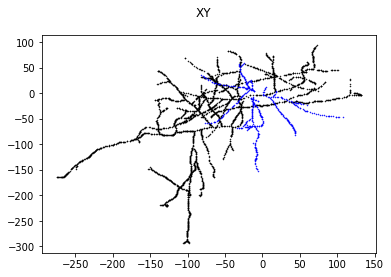

In [3]:
# Center morphologies
for morph in morphs:
    center_morphology(morph)

print('PLOTTING BEFORE ROTATION:')
plot_morphologies([morph1])
plot_morphologies([morph2])

### Computing a 2D rotation along the z axis on the inhibitory cells from your data set

In [4]:
import numpy as np
# Rotation matrix around Z axis, angle theta CCW (degrees)
def rotz(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,0,1]])
    return R


# apply rotation matrix R
def rotate_morphology(morph,R):
    morph.soma.points[:,[0,1,2]] = R.dot(morph.soma.points[:,[0,1,2]].T).T
    for n in morph.neurites:
        n.points[:,[0,1,2]] = R.dot(n.points[:,[0,1,2]].T).T

def rotz_morphology(morph,theta):
    R = rotz(theta)
    rotate_morphology(morph,R)
    
# Modifying the function so as to precise the angle of rotation
def plot_morphologies_with_rot(morphlist, angle_of_rot, plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane+' with rotation angle '+str(angle_of_rot)+'°')
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)


### Plotting the reults in xy plan:

#### --> For Inhibitory Neuron 1:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


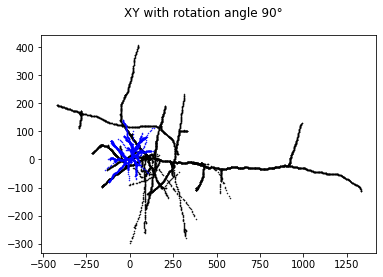

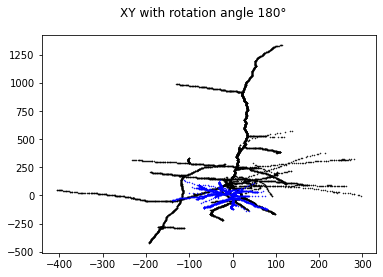

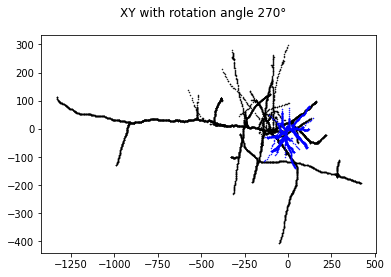

In [5]:
# Doing first rotation rotation at 90°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 90)

# Doing second rotation rotation at 180°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 180)

# Doing first rotation rotation at 270°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 270)

#### --> For Inhibitory Neuron 2:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


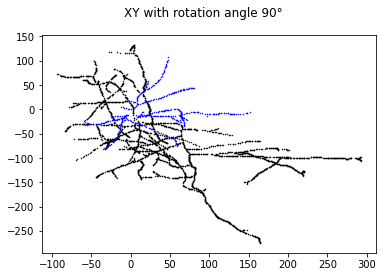

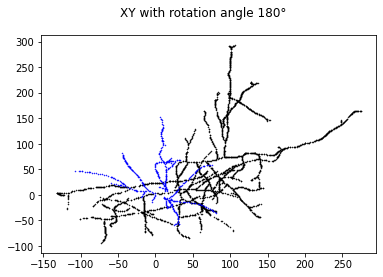

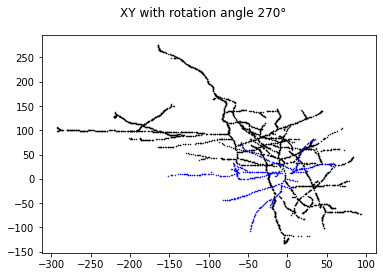

In [6]:
# Doing first rotation rotation at 90°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 90)

# Doing second rotation rotation at 180°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 180)

# Doing first rotation rotation at 270°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 270)

### Computing a 3D rotation to aling the pyramidal cells x axis with the vector (2,1,5)

In [7]:
def align_morphology_X(morph,axis):
    # Rotation matrix that aligns the X axis [1,0,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([1,0,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    rotate_morphology(morph,R)

In [9]:
# Defining the alignment vector:
align_vec = [2,1,5]

### --> For Inhibitory Cell 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


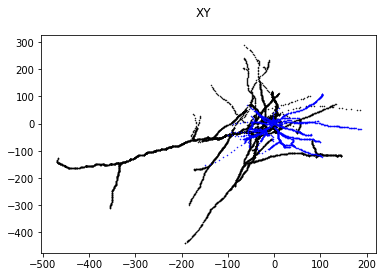

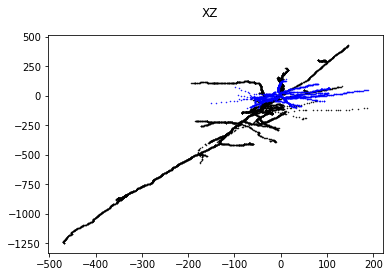

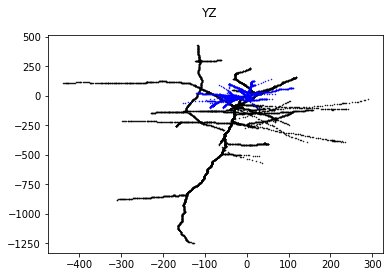

In [10]:
align_morphology_X(morph1,align_vec)

# Plot all three planes
plot_morphologies([morph1],plane = 'XY')
plot_morphologies([morph1],plane = 'XZ')
plot_morphologies([morph1],plane = 'YZ')

### --> For Inhibitory Cell 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


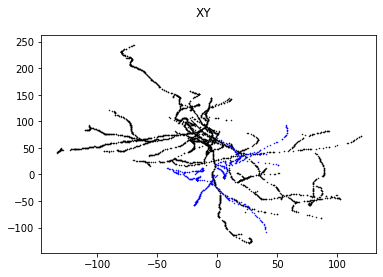

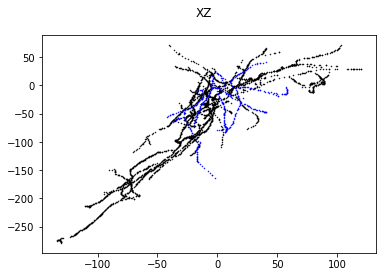

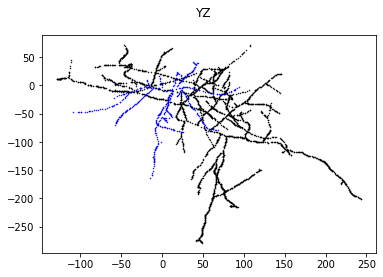

In [11]:
align_morphology_X(morph2,align_vec)

# Plot all three planes
plot_morphologies([morph2],plane = 'XY')
plot_morphologies([morph2],plane = 'XZ')
plot_morphologies([morph2],plane = 'YZ')

## Ex3. Placing cells in a cylinder

<font size='3'>Define a cylinder of radius 210 µm and height 2000 µm. Define 5 random points inside the cylindier to place your cells. The pyramidal cells should be in the region of the column corresponding to layers II-VI, as defined in https://www.cell.com/fulltext/S0092-8674(15)01191-5. The pyramidal cells should have their y axes aligned with the cylinder vertical axes. Larger values on the y axis here should correspond to positions closer to the surface of the column. Two of the pyramidal cells should have their apical dendrites facing up and the other should have its apical dendrites facing down. No rotating or oriented rules have to be applied to the inhibitory cells. Plot the results in 2D, in all three planes. Then, show the result in a 3D plot. [2.5 pts]

### Defining the volume: cylinder of radius 210 µm and height 2000µm

### Define 5 random points inside the cylinder to place your cells

### Correctly placing the pyramidal cells

The pyramidal cells should:
- be in region of column corresponding to layers II-VI
- have their y-axis aligned with cylinder vertical axes (use exercise 2)

(NB: larger values on the y-axis should correspond go positions closer to the of the columnn)

- 2 of the pyramidal cells: should have their apical dendrites facing up
- the other pyramidal cell: should have its apical dendrites afcing down

### Correctly placing the inhibitory cells

- No rotating or oriented rules have to be applied to inhibitory cells

### Plot the results in 2D, in all 3 planes

### Plot the results in 3D

## Ex4. Synaptic Pruning

<font size='3'> The vector provided below represents the number of appositions for a particular EXC-INH connection type. Implement the synapse pruning algorithm from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597796/. Use the following parameter values: B<sub>d</sub> = 0.2. The scaling factor when calculating the post-pruning bouton density is 10^5. After each step, plot a histogram of synapses per connection. At the end, represent the results with two histograms, one histogram of synapses per active connection, and one of synapses per reserve connection. Note that as the data are made up, you should not expect to see the same results as in the paper. 

In [13]:
# Number of appositions for a particular EXC-INH connection type
appositions = np.concatenate((np.ones(5000),2*np.ones(4500),3*np.ones(4000),4*np.ones(3500),5*np.ones(3000),\
                              6*np.ones(2500),7*np.ones(2000),8*np.ones(1700),9*np.ones(1600),10*np.ones(1500),\
                              11*np.ones(1200),12*np.ones(1000),13*np.ones(800),14*np.ones(800),15*np.ones(700),\
                              16*np.ones(600),17*np.ones(550),18*np.ones(500),19*np.ones(450),20*np.ones(400)))

appositions = appositions.astype(int)

### Plotting the initial distribution provided by the vector for a particular EXC-INH connection type

Text(0, 0.5, 'P')

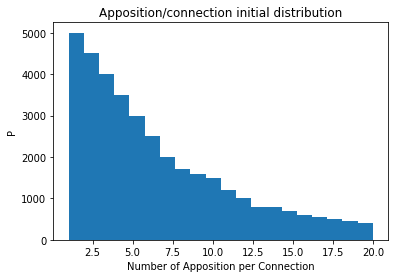

In [19]:
# Plotting the distribution of appositions:

plt.hist(appositions, bins = 20)
plt.title("Apposition/connection initial distribution")
plt.xlabel("Number of Apposition per Connection")
plt.ylabel("P")

### Implementing the synapse pruning algorithm:

In [20]:
# Defining the parameters that we want

B_d = 0.2 # Bouton density
scaling_fact = 10e5 # Scaling factor when calculating the post-pruning bouton density

### Resulting 2 histograms